# Script to evaluate model spatial prediction accuracy 

This script evaluates the overall and spatial accuacy of SWEMLv2.0

In [2]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib
import warnings
import SSWEET

HOME = os.path.expanduser('~')


In [3]:
#Model run
output_res = '300M_Resolution'
DataFrame = 'Sturm_Seasonality_PrecipVIIRSGeoObsDFs'
fSCA_thresh = '20_fSCA_Thresh'

#Prediction path
Ppath = f"{HOME}/SWEMLv2.0/Predictions/{DataFrame}/{output_res}/{fSCA_thresh}"

#Load data
EvalDF = pd.read_parquet(f"{Ppath}/All_Feats_HoldOut_03-29-2019.parquet")

#Change obs/pred column names if necessary
EvalDF.rename(columns={'ASO_swe_cm':'y_test','XGBoost_swe_cm':'y_pred'}, inplace=True)

EvalDF.head(5)

,cell_id,Date,cen_lat,cen_lon,Elevation_m,Slope_Deg,Aspect_Deg,ns_1,ns_2,ns_3,...,Seasonal_ns_3_rel,Seasonal_ns_4_rel,Seasonal_ns_5_rel,Seasonal_ns_6_rel,sturm_value,swe_cm,region,region_class,y_test,y_pred
0,Southwest_300M_37.65_-119.475,2019-03-29,37.650047,-119.474653,2376,38,221,122.2,103.0,145.1,...,2.358723,-0.525764,-0.046508,-0.051135,8,85.088968,Southwest,2,85.088968,144.000641
1,Southwest_300M_37.596_-119.518,2019-03-29,37.596047,-119.517853,2860,32,273,145.1,103.0,122.2,...,2.066611,-0.051135,-0.046508,-0.525764,8,187.475502,Southwest,2,187.475502,173.257294
2,Southwest_300M_37.772_-119.626,2019-03-29,37.771804,-119.626204,2420,18,283,130.4,92.4,87.0,...,-0.525764,1.821781,1.598129,1.503276,8,124.055254,Southwest,2,124.055254,116.719795
3,Southwest_300M_37.772_-119.629,2019-03-29,37.771804,-119.628904,2392,30,278,130.4,92.4,87.0,...,-0.525764,1.821781,1.598129,1.503276,8,138.244832,Southwest,2,138.244832,120.312088
4,Southwest_300M_37.772_-119.631,2019-03-29,37.771547,-119.631253,2347,30,294,130.4,92.4,87.0,...,-0.525764,1.821781,1.598129,1.503276,8,132.539642,Southwest,2,132.539642,110.147942


## Parity Plot

A parity plot is a scatterplot that compares a set of model estimates against benchmark data, i.e., the observations. Each point has coordinates (x, y), where x is a benchmark value and y is the corresponding value from the model. A parity plot is often the first visualization to investigate the skill of a model.

In [9]:
import importlib
importlib.reload(SSWEET)

<module 'SSWEET' from '/home/whitelightning450/SWEMLv2.0/Evaluation/SSWEET.py'>

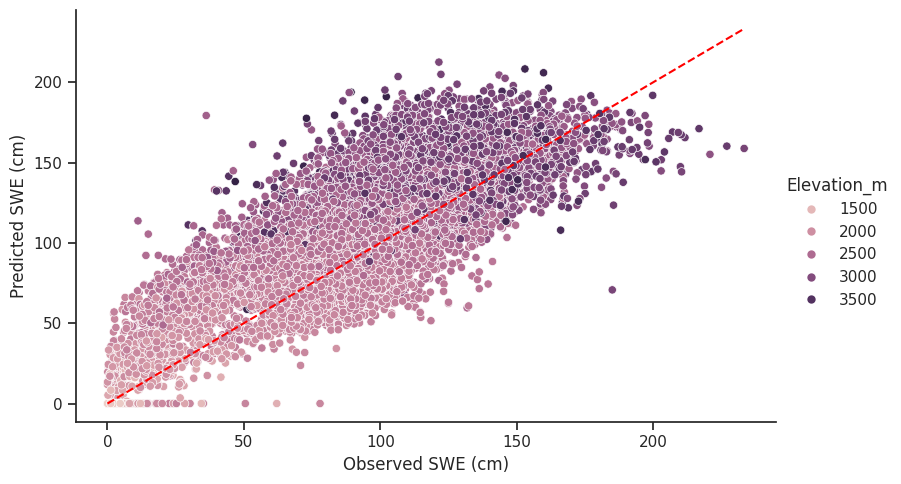

,R2,RMSE,KGE,PBias,R2_fSCA,RMSE_fSCA,KGE_fSCA,PBias_fSCA
0,0.45,29.52,0.74,-16.97,0.45,29.52,0.74,-16.97


<Figure size 640x480 with 0 Axes>

In [11]:
savfig = True
figname = 'Merced_Parity_20190329'

Performance = SSWEET.parityplot(EvalDF, savfig, figname)
Performance

## Percent Error compared to elevation
*note, error greater than |100%| is adjusted to |100%|

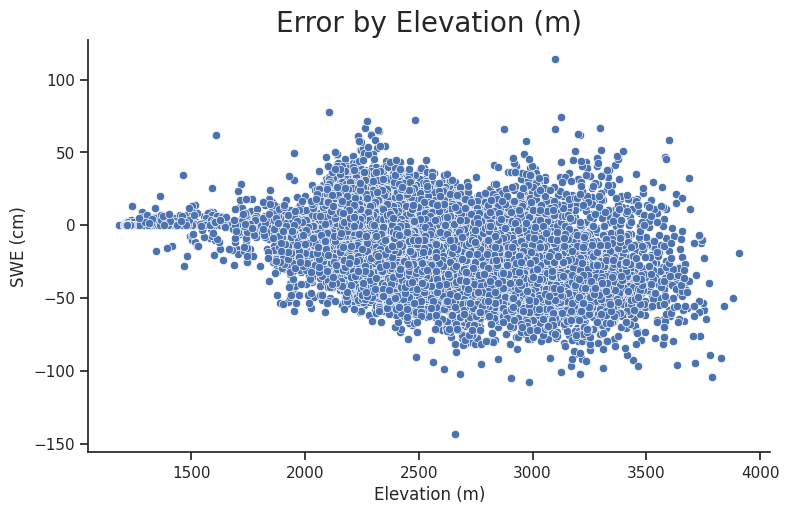

In [5]:
SSWEET.Model_Vs(EvalDF,'Elevation_m', 'Error')

# Spatial Evaluation of the Model

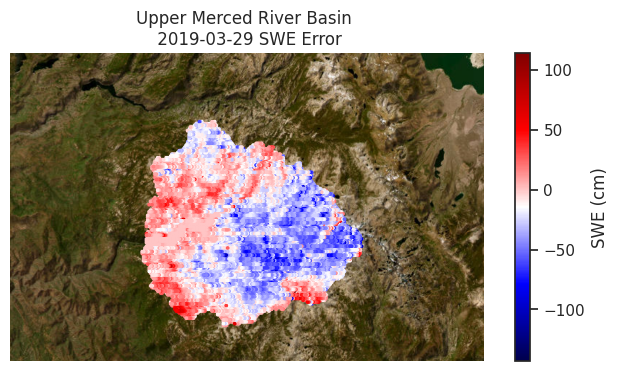

In [6]:

cmap = 'seismic' # use seismic for error, viridis or blues for preds/obs
var = 'error'
Title = 'Upper Merced River Basin \n 2019-03-29 SWE Error'
savfig = True
variant = 'World_Imagery'
figname = 'Merced_Error_20190329'

SSWEET.SpatialAnalysis(EvalDF, cmap, var,Title, savfig, variant, figname)